# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Beth Harvey
https://github.com/bethharvey/wmnlp-06-web-scraping

The goal of this project is to practice web scraping and processing the data gained from web scraping.

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [5]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob


!pip list

print('All prereqs installed.')

Package            Version
------------------ ---------
appnope            0.1.3
asttokens          2.2.1
backcall           0.2.0
beautifulsoup4     4.12.2
blis               0.7.10
bs4                0.0.1
catalogue          2.0.9
certifi            2023.7.22
charset-normalizer 3.2.0
click              8.1.6
comm               0.1.3
confection         0.1.0
contourpy          1.1.0
cycler             0.11.0
cymem              2.0.7
debugpy            1.6.7
decorator          5.1.1
en-core-web-sm     3.6.0
executing          1.2.0
fonttools          4.41.1
html5lib           1.1
idna               3.4
ipykernel          6.25.0
ipython            8.14.0
jedi               0.19.0
Jinja2             3.1.2
joblib             1.3.1
jupyter_client     8.3.0
jupyter_core       5.3.1
kiwisolver         1.4.4
langcodes          3.3.0
MarkupSafe         2.1.3
matplotlib         3.7.2
matplotlib-inline  0.1.6
murmurhash         1.0.9
nest-asyncio       1.5.7
nltk               3.8.1
numpy       

### Question 1. 
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
# Get Response object for desired webpage
response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

# Get the text of the webpage
text = response.text

# Dump to .pkl file
with open('laser-headlights.pkl', 'wb') as file:
    pickle.dump(text, file)

### Question 2
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
# Read file contents in
with open('laser-headlights.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Parse HTML content with html5lib
parser = 'html5lib'
soup = BeautifulSoup(article_html, parser)

article_element = soup.find('article')

# Print article text
print(article_element.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

### Question 3. 
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
# Train spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Apply pipeline to article text
doc = nlp(article_element.get_text())

# Define function to remove spaces, punctuation, and stopwords
def significant_tokens(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Get only "interesting" tokens
good_tokens = [token.text.lower() for token in doc if significant_tokens(token)]

# Get word frequencies
token_count = Counter(good_tokens)
top_5_token = token_count.most_common(5)

print('Token          Frequency')
for token, count in top_5_token:
    print(f'{token:<10} {count:>9}')

Token          Frequency
laser             35
headlights        19
headlight         11
technology        10
led               10


### Question 4. 
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
# Use article text from Question 3 to extract 5 most frequent lemmas
good_lemmas = [token.lemma_.lower() for token in doc if significant_tokens(token)]
lemma_count = Counter(good_lemmas)
top_5_lemma = lemma_count.most_common(5)

print('Lemma          Frequency')
for lemma, count in top_5_lemma:
    print(f'{lemma:<10} {count:>9}')

Lemma          Frequency
laser             40
headlight         28
beam              12
technology        10
light             10


### Question 5. 
Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [11]:
# Define function to calculate interesting word: total words ratio
def score_sentence_by_token(sentence, interesting_token):
    total_word_count = len([token for token in sentence])
    interesting_word_count = len([token.text.lower() for token in sentence if token.text in interesting_token])
    token_score = interesting_word_count / total_word_count
    return token_score

# Test function on first sentence of article
sentences = list(doc.sents)
print(score_sentence_by_token(sentences[0], good_tokens))

0.15


In [12]:
# Define function to calculate interesting lemma: total words ratio
def score_sentence_by_lemma(sentence, interesting_lemmas):
    total_word_count = len([word for word in sentence])
    interesting_lemma_count = len([token.lemma_.lower() for token in sentence if token.lemma_ in interesting_lemmas])
    lemma_score = interesting_lemma_count / total_word_count
    return lemma_score

# Test function on first sentence of article
sentences = list(doc.sents)
print(score_sentence_by_lemma(sentences[0], good_lemmas))

0.15


### Question 6. 
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

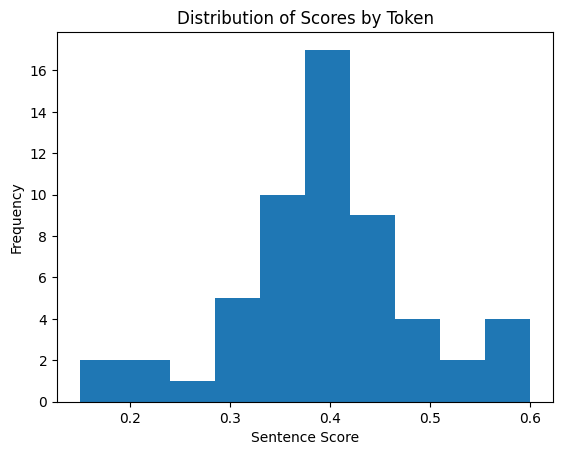

In [17]:
# Get list of scores by token
token_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_token(sentence, good_tokens)
    token_scores.append(score)

# Plot distribution of scores
plt.hist(token_scores)
plt.title('Distribution of Scores by Token')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

# The most common range of scores by token is between 0.40 and 0.45.

### Question 7. 
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

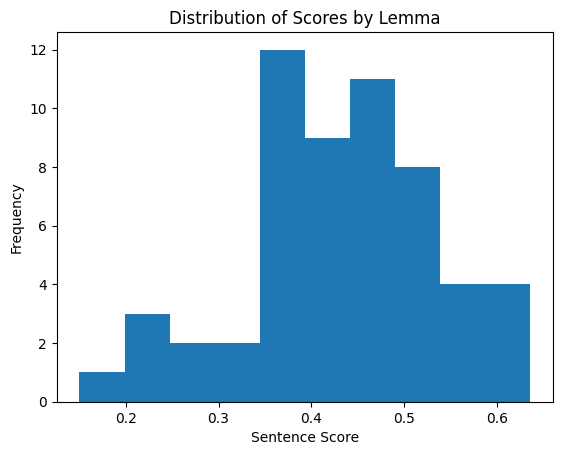

In [20]:
# Get list of scores by lemma
lemma_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_lemma(sentence, good_lemmas)
    lemma_scores.append(score)

plt.hist(lemma_scores)
plt.title('Distribution of Scores by Lemma')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

# The most common range of scores is between 0.35 and 0.40.

### Question 8. 
Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).